<a href="https://www.kaggle.com/code/siddp6/landscape-generative-adversarial-networks?scriptVersionId=177021676" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Imports

In [1]:
import torch
import os

import torchvision.transforms as T
import matplotlib.pyplot as plt  

from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision.utils import make_grid

## Data

In [2]:
data_path = "/kaggle/input/landscape-pictures"

In [3]:
image_size = 224
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5) 
batch_size = 128

transformer = T.Compose([
    T.Resize(image_size),
    T.CenterCrop(image_size),
    T.RandomHorizontalFlip(.5),
    T.RandAugment(num_ops=2, magnitude=15),
    T.ToTensor(),
    T.Normalize(*stats)
])

In [4]:
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = [os.path.join(root_dir, img) for img in os.listdir(root_dir) if img.endswith(('png', 'jpg', 'jpeg'))]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

dataset = CustomImageDataset(data_path, transform=transformer)


In [5]:
dataset_loader = DataLoader(dataset, batch_size, shuffle=True, num_workers=3, pin_memory=True)

In [6]:
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]

def show_images(images, nmax=2):
    plt.imshow(make_grid(denorm(images[:nmax]), nrow=2).permute(1, 2, 0))

def show_batch(dl):
    for images in dl:
        show_images(images)
        break

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


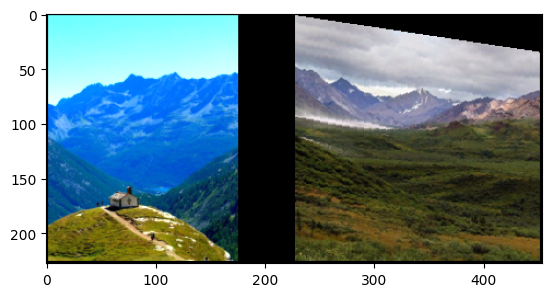

In [7]:
show_batch(dataset_loader)